# Life Expectance Prediction using Kaggle Dataset - Ganesh Ram Gururajan

## Basic Data Cleaning and Visualization

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [10]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/life_exp.csv')

In [11]:
data.shape

(414, 5)

In [12]:
data.head()

,Year,Race,Sex,Av_Life Expectancy,Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


## To visualize missing values

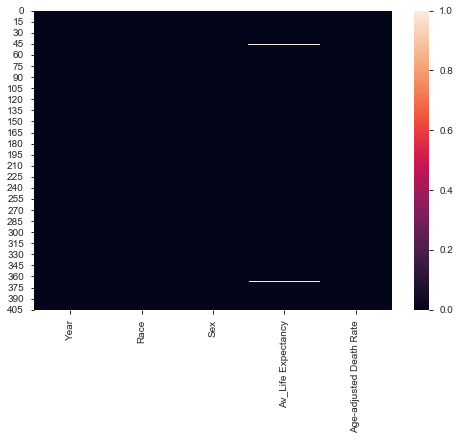

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.tail()

,Year,Race,Sex,Av_Life Expectancy,Age-adjusted Death Rate
409,1974,White,Male,69.0,1450.8
410,1973,White,Male,68.5,1507.2
411,1972,White,Male,68.3,1520.2
412,1971,White,Male,68.3,1514.4
413,1970,White,Male,68.0,1513.7


In [15]:
pandas_profiling.ProfileReport(data)

In [16]:
def life_exp_impute(col):
    if pd.isnull(col):
        return data['Av_Life_Expectancy'].mean()
    else:
        return col

In [17]:
data['Av_Life_Expectancy'] = data['Av_Life_Expectancy'].apply(life_exp_impute)

## Imputed Data

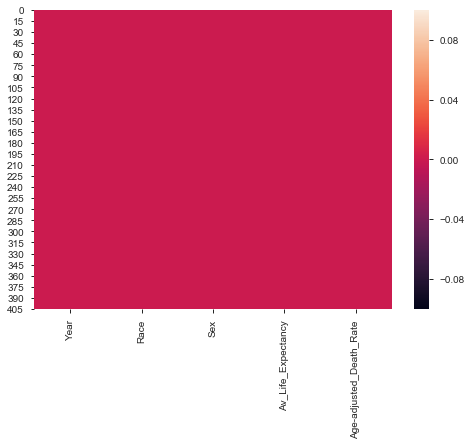

In [18]:
sns.heatmap(data.isnull())

## Correlation Visualization

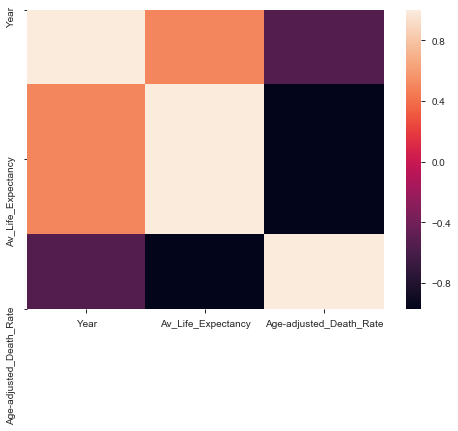

In [19]:
sns.heatmap(data.corr())

## Assigning Dummies using custom function

In [23]:
data['Race'].value_counts()

All Races    138
White        138
Black        138
Name: Race, dtype: int64

In [24]:
data['Sex'].value_counts()

Female        138
Male          138
Both Sexes    138
Name: Sex, dtype: int64

In [25]:
race_list = list(data['Race'].value_counts().index)
sex_list = list(data['Sex'].value_counts().index)

In [26]:
def race_dummy(col):
    return race_list.index(col)

def sex_dummy(col):
    return sex_list.index(col)

In [27]:
data['Race'] = data['Race'].apply(race_dummy)
data['Sex'] = data['Sex'].apply(sex_dummy)

In [28]:
data.head()

,Year,Race,Sex,Av_Life_Expectancy,Age-adjusted_Death_Rate
0,2015,0,2,73.935309,733.1
1,2014,0,2,78.900000,724.6
2,2013,0,2,78.800000,731.9
3,2012,0,2,78.800000,732.8
4,2011,0,2,78.700000,741.3


## Cleaned Data and verification of dummies assignment

In [29]:
data['Race'].value_counts()

2    138
1    138
0    138
Name: Race, dtype: int64

In [30]:
data['Sex'].value_counts()

2    138
1    138
0    138
Name: Sex, dtype: int64

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = data.drop(['Av_Life_Expectancy'],axis=1)

In [36]:
y = data['Av_Life_Expectancy']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=100)

# Machine Learning

## Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor

## Search of best n_estimators value in RandomForest

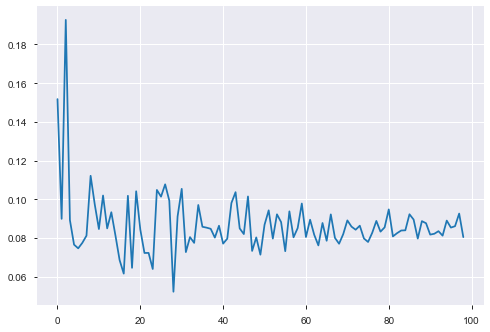

In [95]:
error = []

for i in range(1,100):
    rf_i = RandomForestRegressor(n_estimators=i)
    rf_i.fit(X_train,y_train)
    pred_i = rf_i.predict(X_test)
    error.append(mean_squared_error(y_test,pred_i))
    
plt.plot(error)

In [96]:
error.index(min(error))

28

In [97]:
rf = RandomForestRegressor(n_estimators=28)

## Fitting and Prediction

In [98]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=28,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [99]:
pred1 = rf.predict(X_test)

## Random Forest Evaluation, MSE, MAE, R2_Score

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss

In [101]:
print(mean_absolute_error(y_test,pred1))

0.20856345007138405


In [102]:
print(mean_squared_error(y_test,pred1))

0.08846444791218634


In [103]:
print(r2_score(y_test,pred1))

0.9952771014193166


# End